In [3]:
library(ggplot2)
library(tidyverse)
library(kknn)
library(caret)
library(grid)
library(gridExtra)
library(class)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:kknn’:

    contr.dummy


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
flight_data <- read.csv("data/ABIA.csv")

Warning message:
“Removed 181 rows containing non-finite values (`stat_summary()`).”


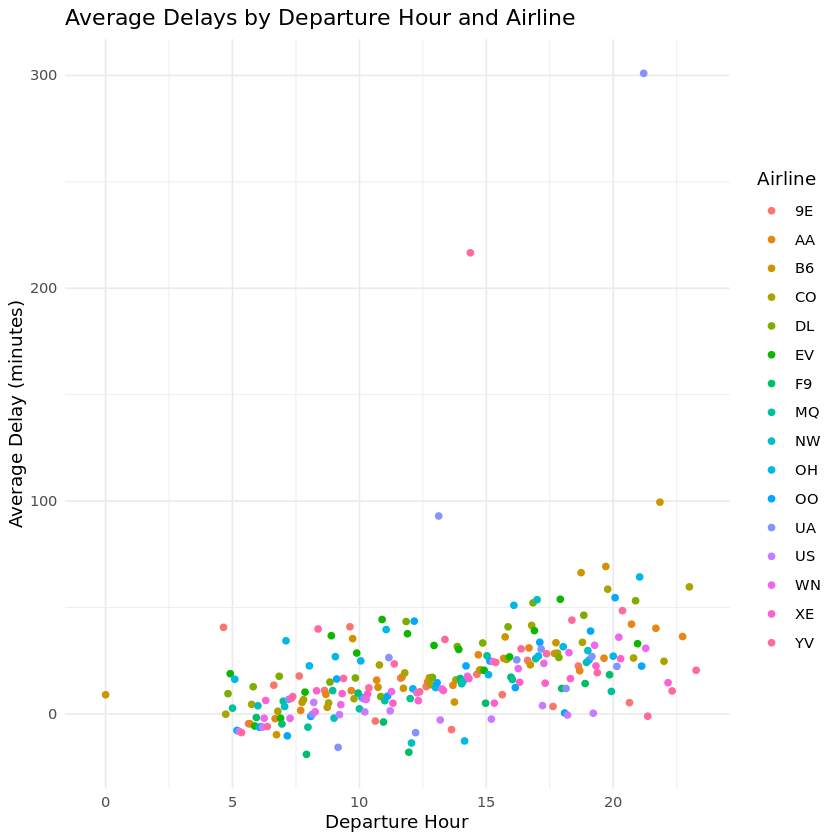

In [5]:
# Convert time-related columns to POSIXct format
flight_data$CRSDepTime <- as.POSIXct(sprintf("%04d", flight_data$CRSDepTime), format="%H%M", tz="UTC")
flight_data$CRSArrTime <- as.POSIXct(sprintf("%04d", flight_data$CRSArrTime), format="%H%M", tz="UTC")

# Extract hour of the day
flight_data$DepHour <- hour(flight_data$CRSDepTime)
flight_data$ArrHour <- hour(flight_data$CRSArrTime)

# Filter out cancelled flights
filtered_data <- flight_data %>% filter(!Cancelled)

# Create a plot
ggplot(filtered_data, aes(x = DepHour, y = DepDelay + ArrDelay, color = UniqueCarrier)) +
  stat_summary(fun = "mean", geom = "point", position = position_dodge(width = 0.8)) +
  labs(title = "Average Delays by Departure Hour and Airline",
       x = "Departure Hour",
       y = "Average Delay (minutes)",
       color = "Airline") +
  theme_minimal()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


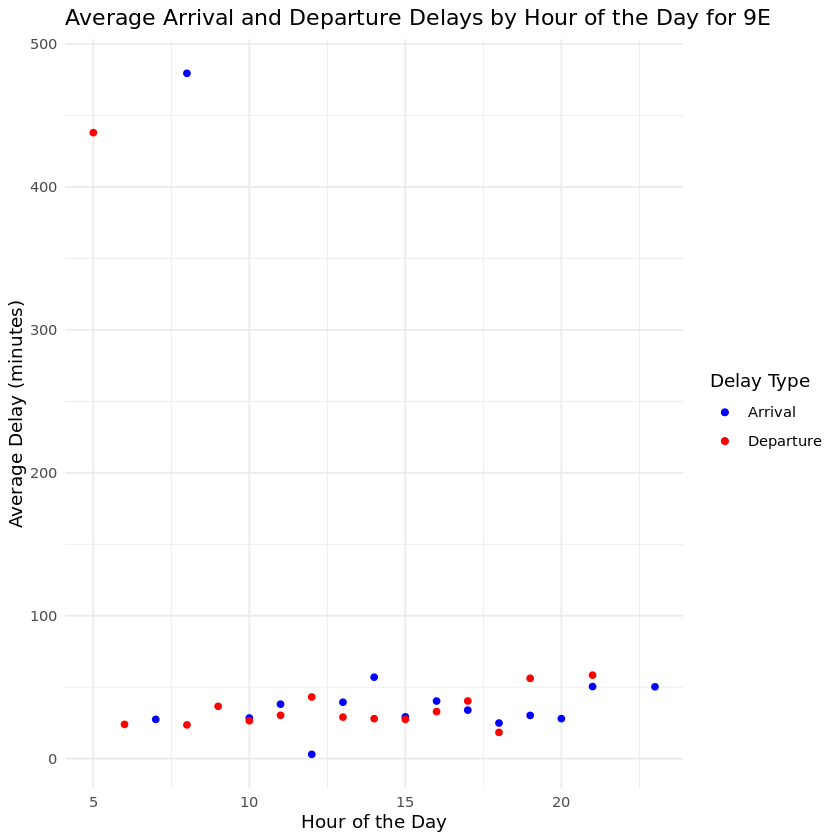

In [108]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "9E")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for 9E",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()
  

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


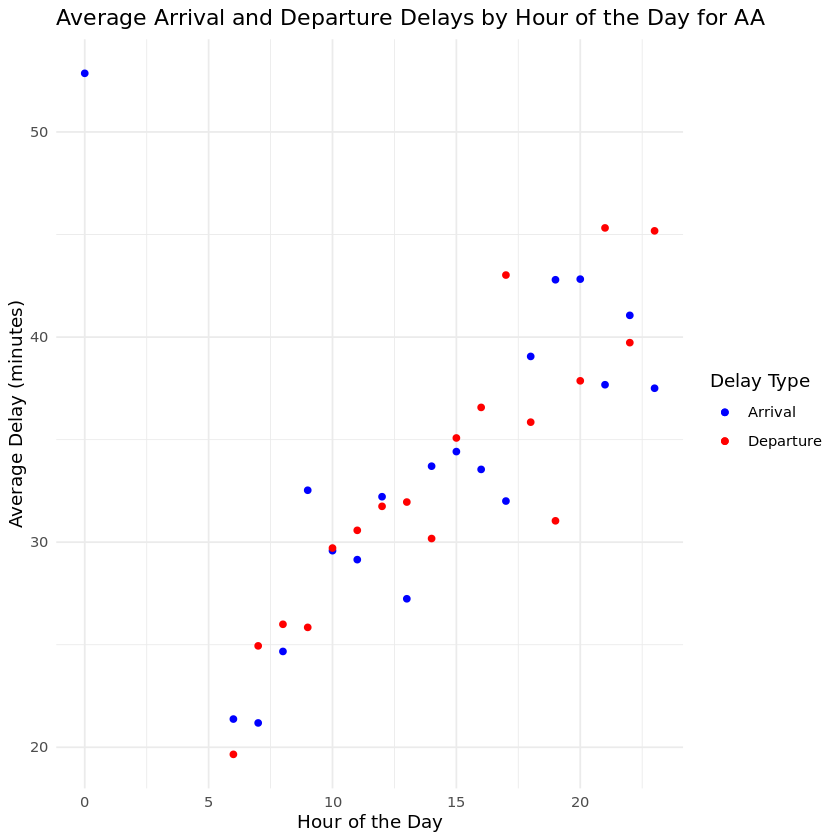

In [109]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "AA")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for AA",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


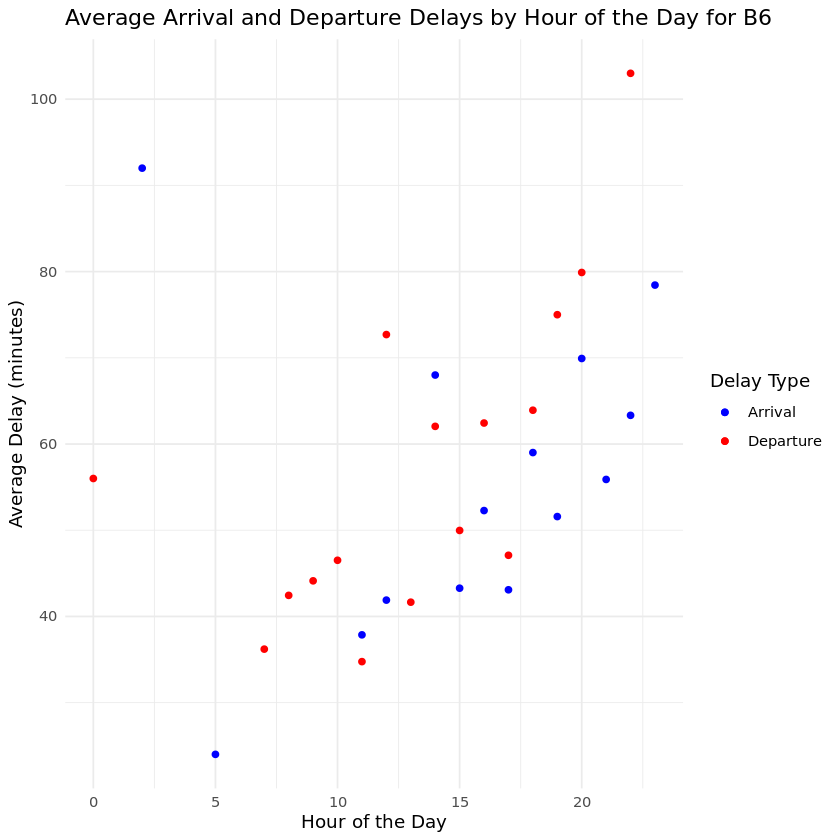

In [110]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "B6")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for B6",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


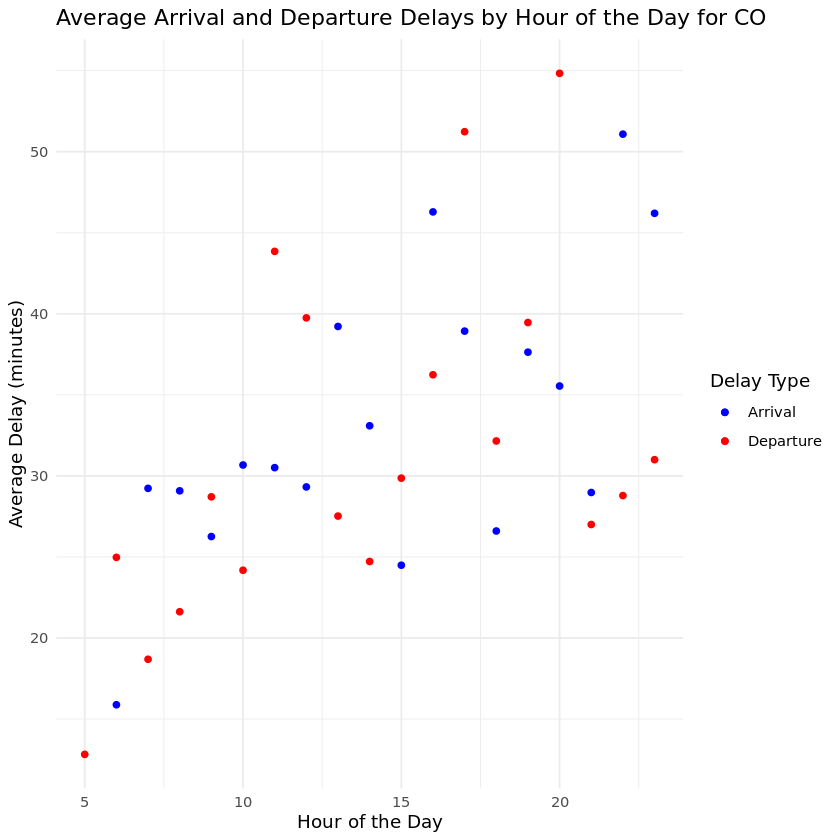

In [111]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "CO")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for CO",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()
  

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


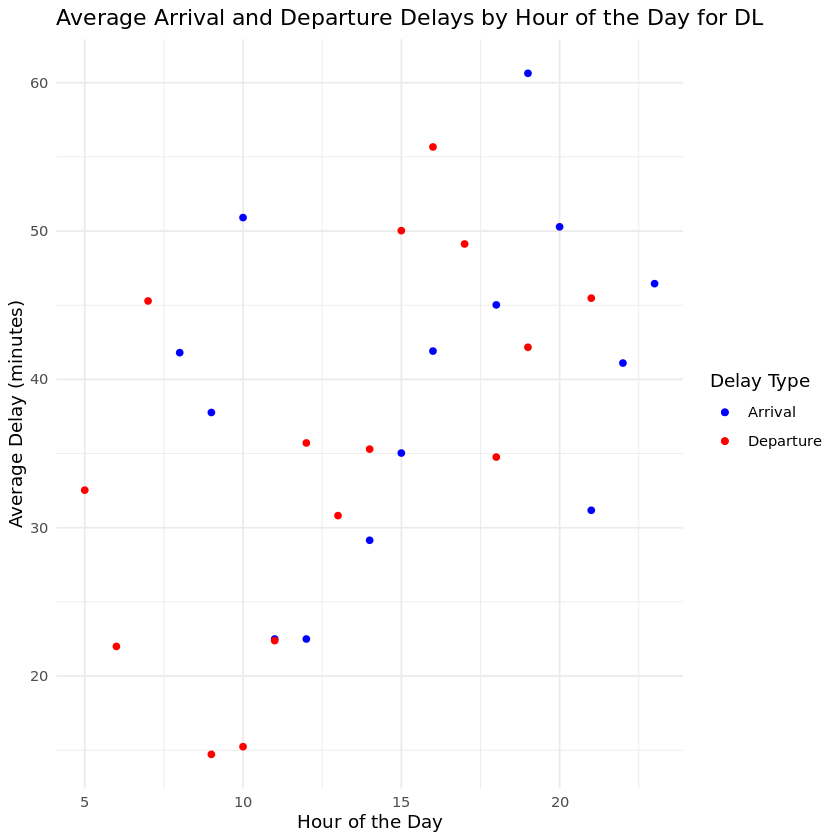

In [112]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "DL")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for DL",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


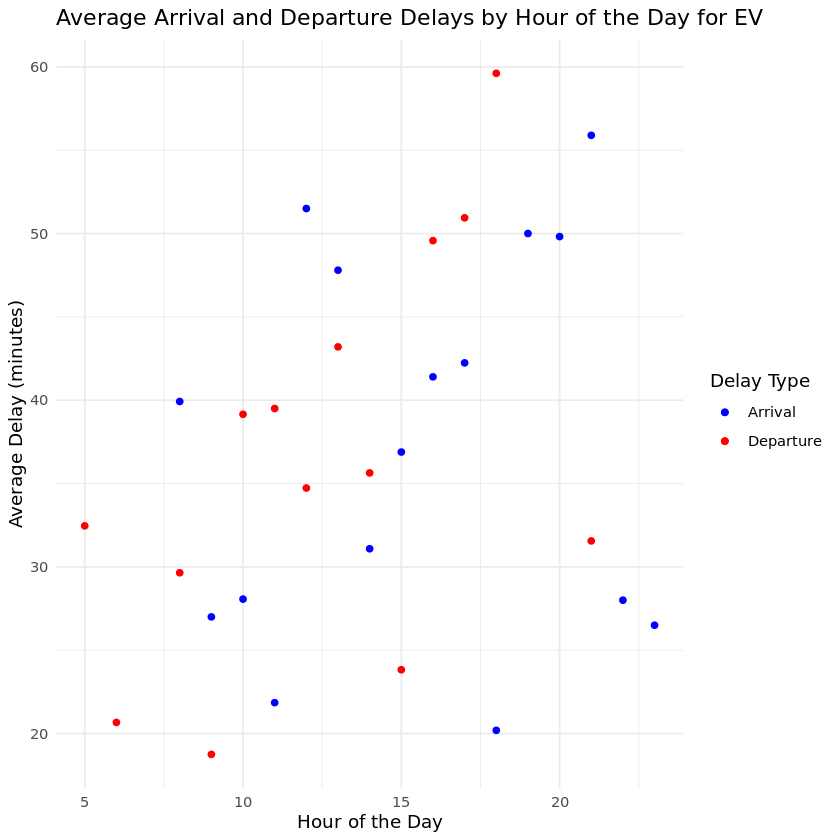

In [113]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "EV")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for EV",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


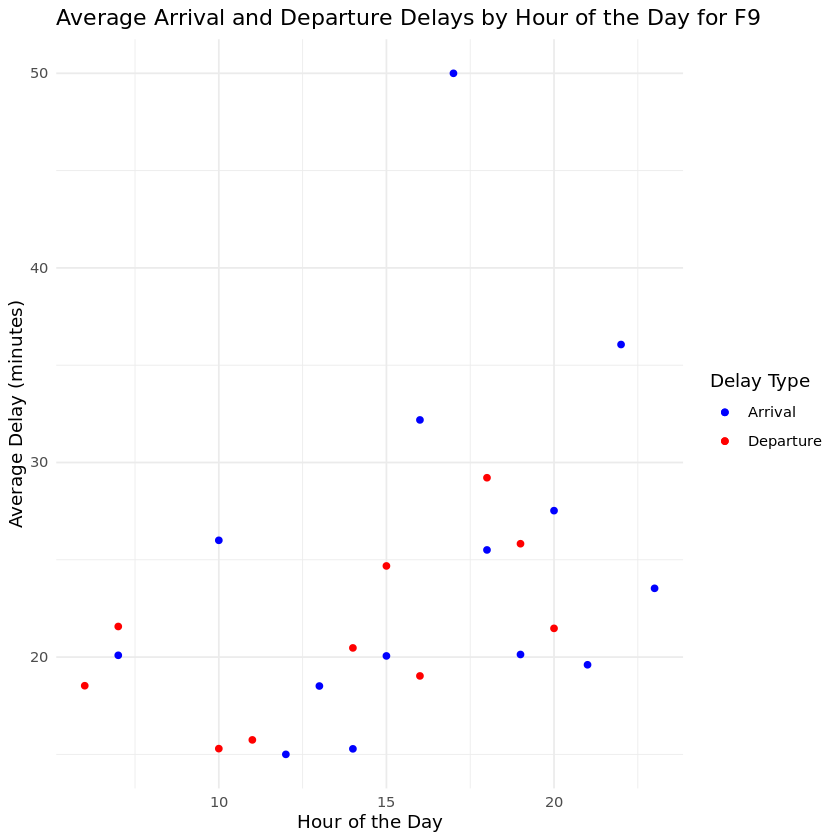

In [114]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "F9")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for F9",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


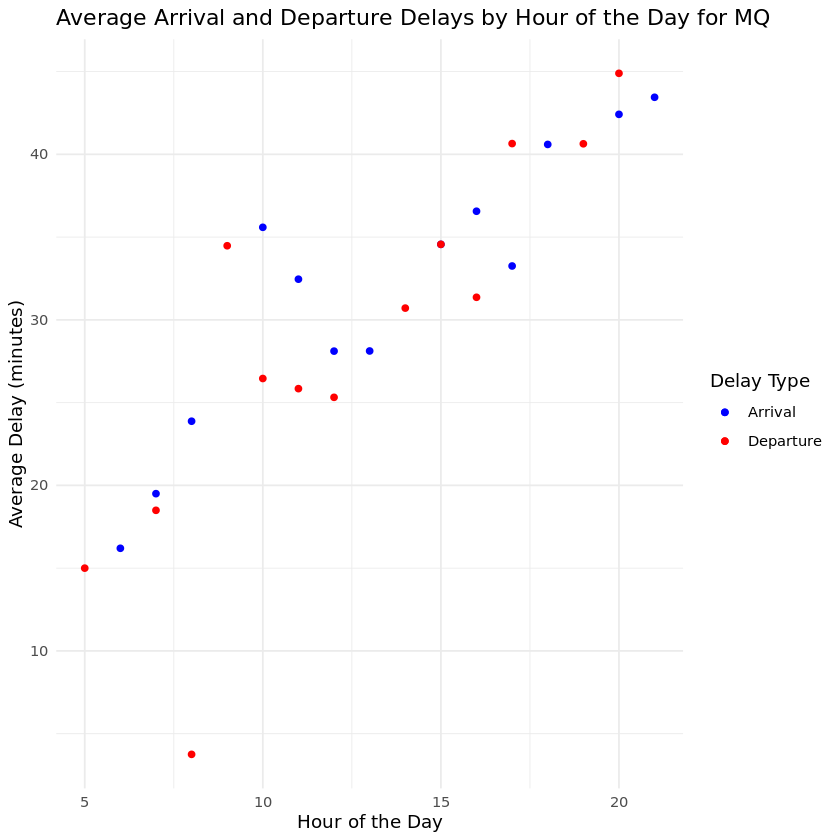

In [115]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "MQ")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for MQ",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


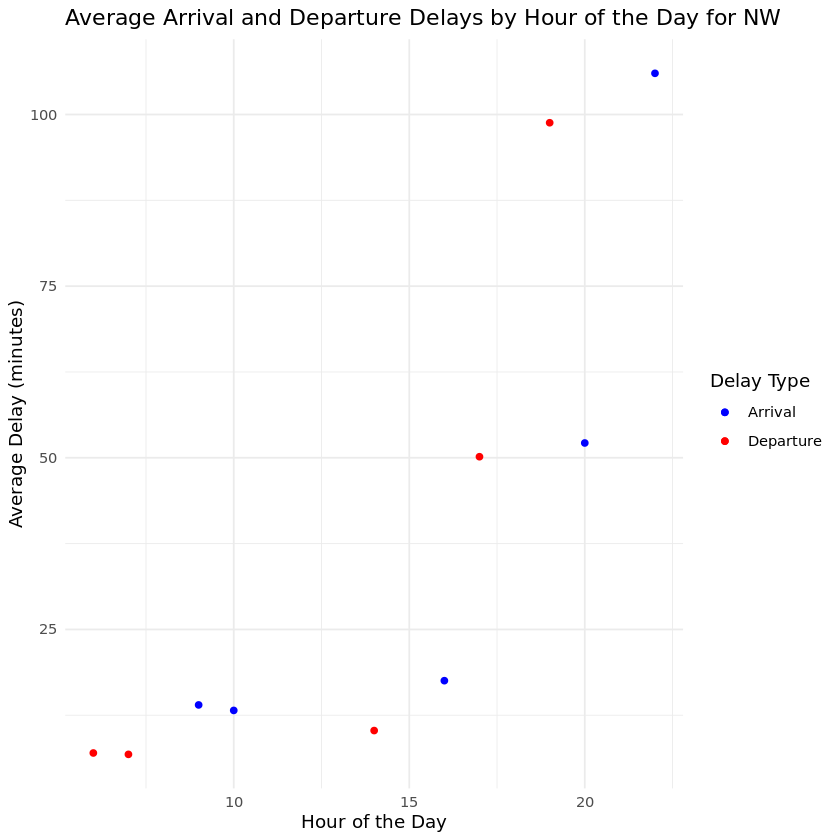

In [116]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "NW")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for NW",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


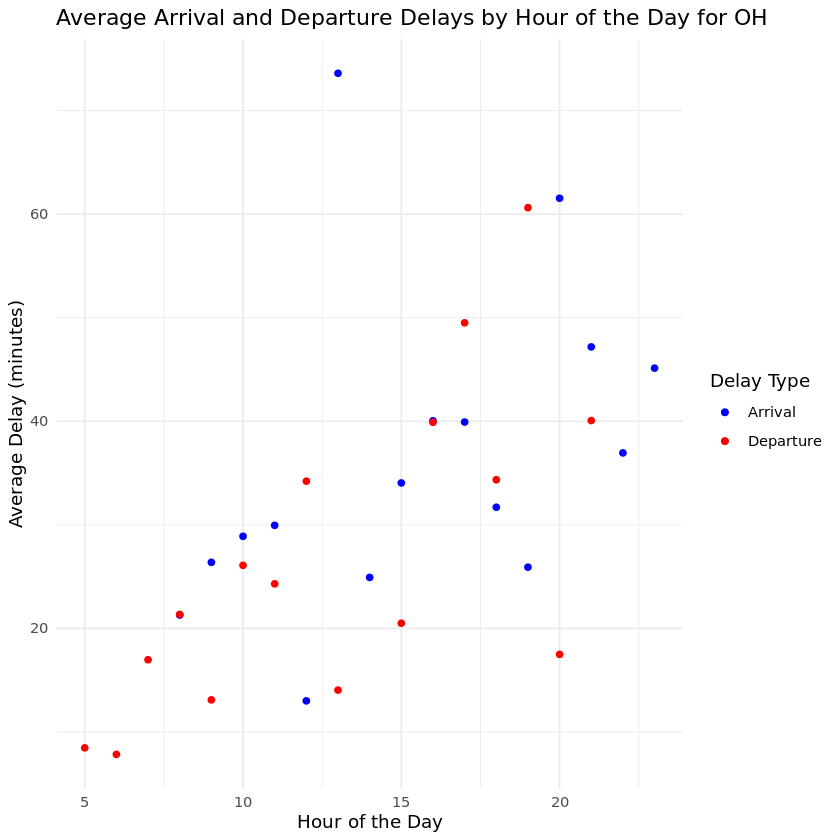

In [117]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "OH")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for OH",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


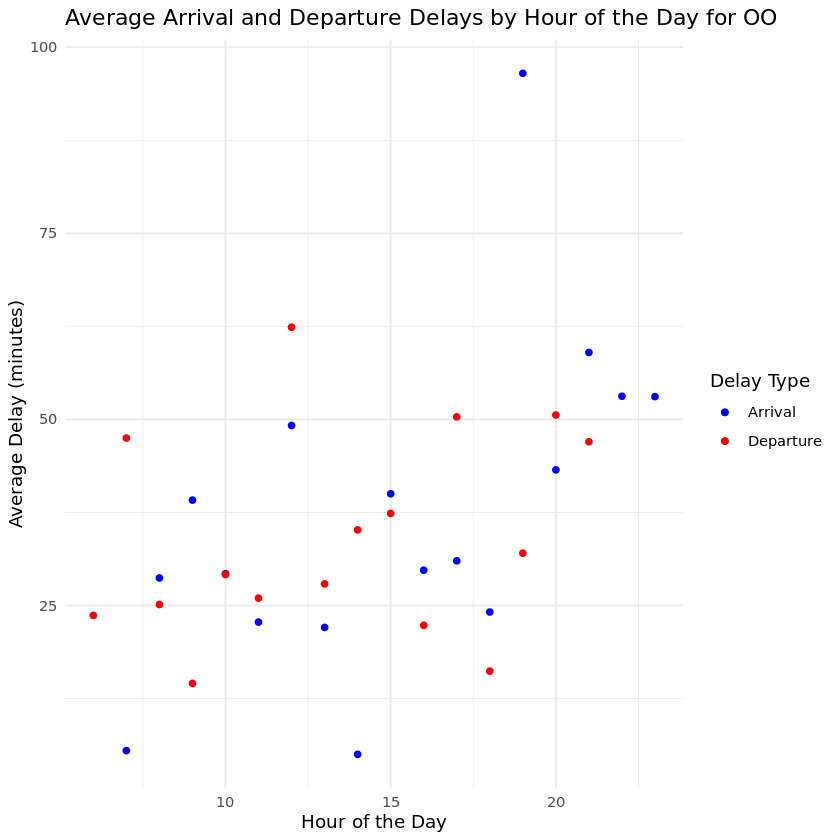

In [118]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "OO")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for OO",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


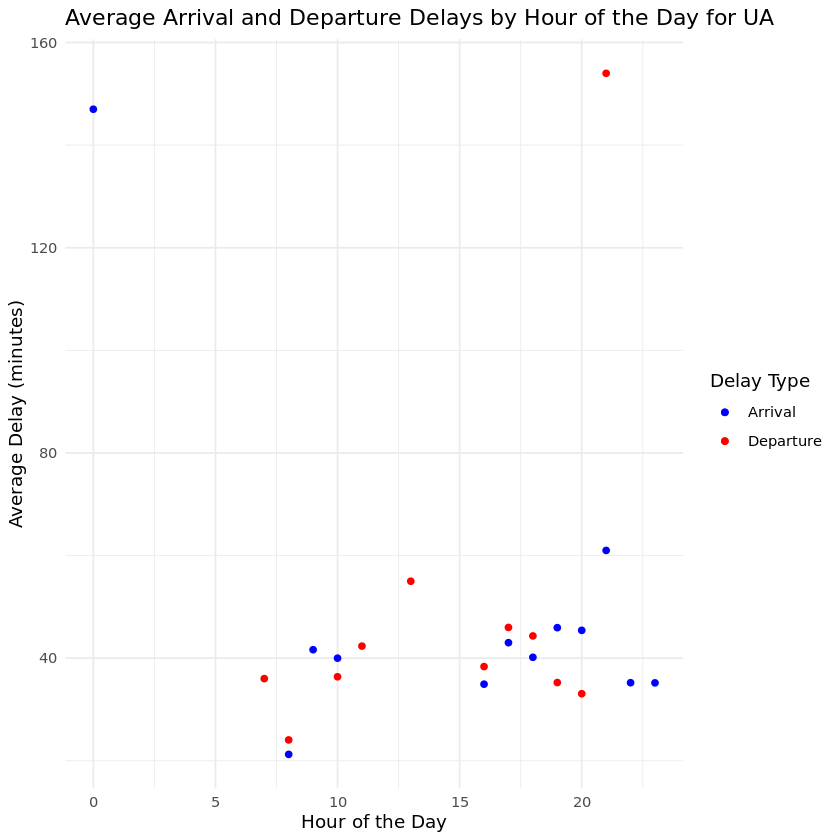

In [32]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "UA")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for UA",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


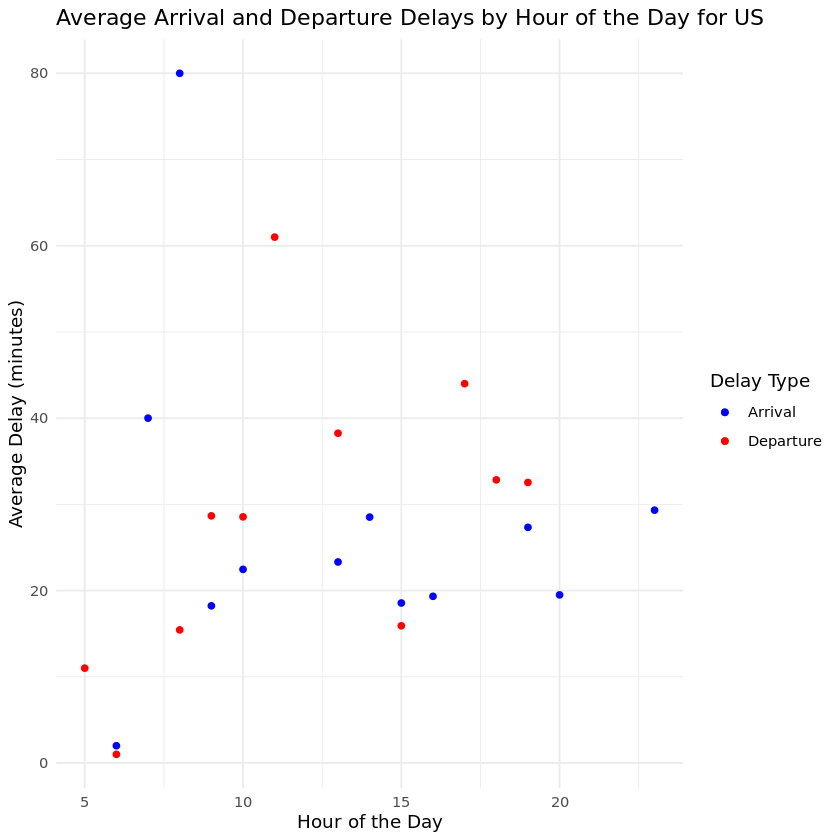

In [119]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "US")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for US",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


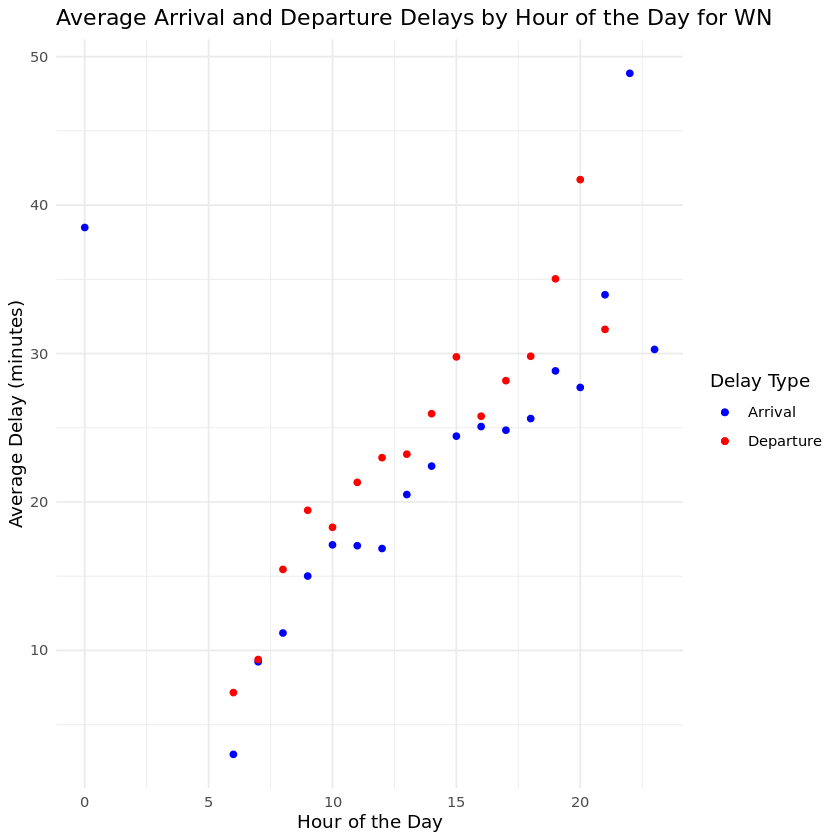

In [120]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "WN")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for WN",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


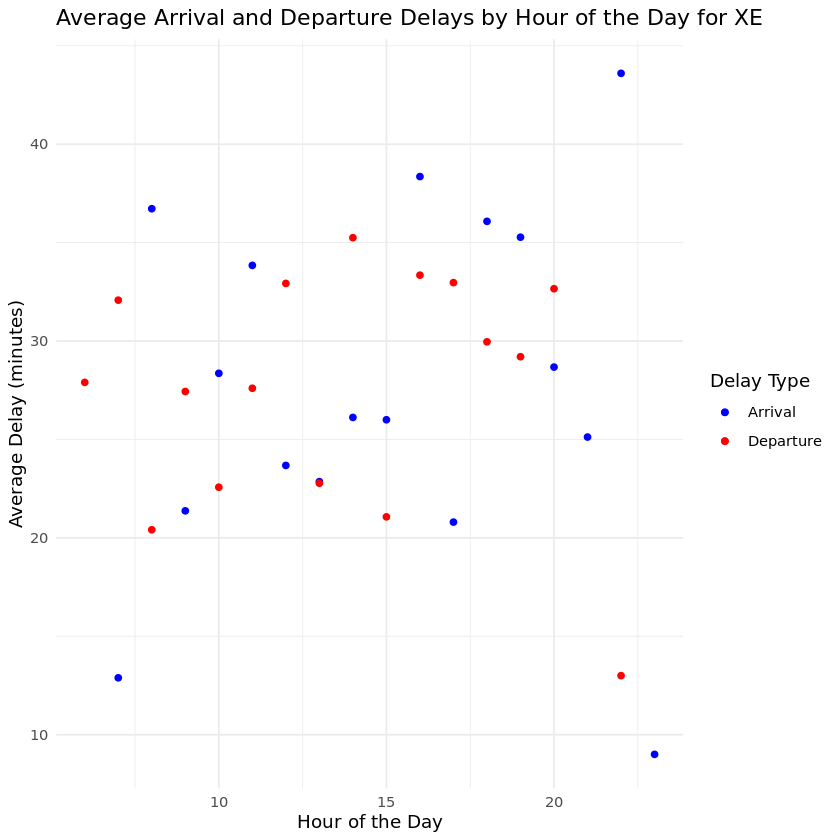

In [121]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "XE")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for XE",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


[1] "It seems like the best time of day to fly to minimize delays is wee hours. And this would not vary by airlines"


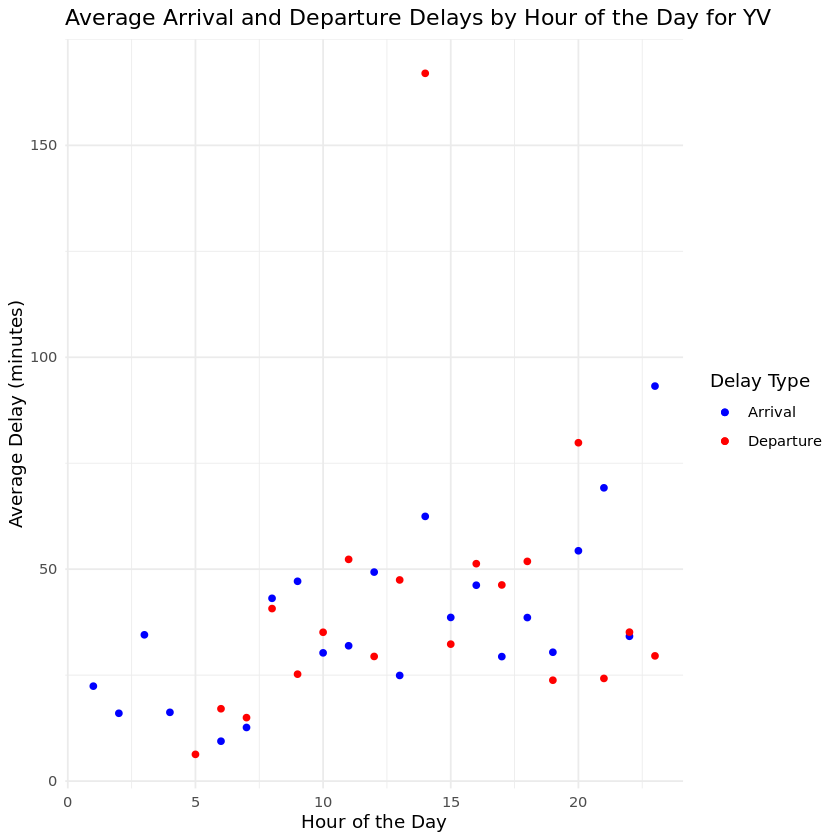

In [122]:
# Filter out rows with missing or negative arrival delay
filtered_data <- flight_data %>%
  filter(!is.na(ArrDelay) & ArrDelay >= 0 & !is.na(DepDelay) & DepDelay >= 0)

# Filter data for a specific airline (e.g., 9E)
airline_data <- filtered_data %>% filter(UniqueCarrier == "YV")

# Calculate average ArrDelay and DepDelay for each hour of the day
average_arr_delay <- airline_data %>%
  group_by(ArrHour) %>%
  summarize(AvgArrDelay = mean(ArrDelay))

average_dep_delay <- airline_data %>%
  group_by(DepHour) %>%
  summarize(AvgDepDelay = mean(DepDelay))

# Merge the two datasets to create a common x-axis
merged_data <- merge(average_arr_delay, average_dep_delay, by.x = "ArrHour", by.y = "DepHour", all = TRUE)

# Create a plot for both ArrDelay and DepDelay
ggplot(merged_data, aes(x = ArrHour)) +
  geom_point(aes(y = AvgArrDelay, color = "Arrival")) +
  geom_point(aes(y = AvgDepDelay, color = "Departure")) +
  labs(title = "Average Arrival and Departure Delays by Hour of the Day for YV",
       x = "Hour of the Day",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_color_manual(values = c("Arrival" = "blue", "Departure" = "red")) +
  theme_minimal()
print("It seems like the best time of day to fly to minimize delays is wee hours. And this would not vary by airlines")

`summarise()` has grouped output by 'Dest'. You can override using the
`.groups` argument.


Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


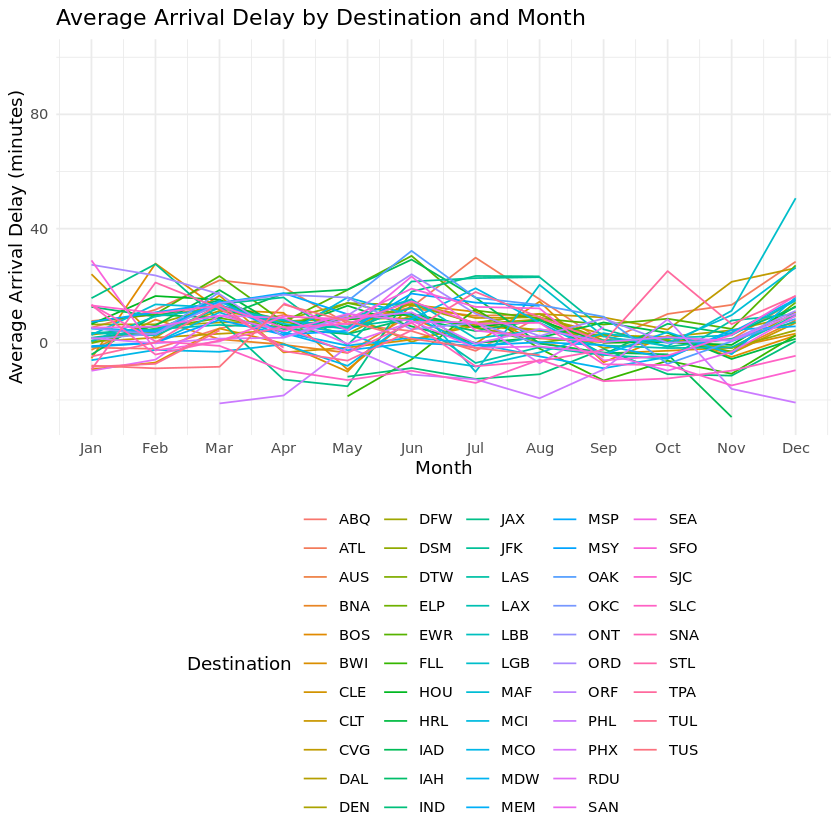

In [123]:
# Group data by destination and month, calculate average arrival delay
avg_delay_by_destination <- flight_data %>%
  group_by(Dest, Month) %>%
  summarize(AvgArrDelay = mean(ArrDelay, na.rm = TRUE))

# Create a plot
ggplot(avg_delay_by_destination, aes(x = Month, y = AvgArrDelay, group = Dest, color = Dest)) +
  geom_line() +
  labs(title = "Average Arrival Delay by Destination and Month",
       x = "Month",
       y = "Average Arrival Delay (minutes)",
       color = "Destination") +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_continuous(breaks = 1:12, labels = month.abb) # Use abbreviated month names

[1] "It seems like the best time of year to fly to minimize delays to AUS is from Sep to Nov."


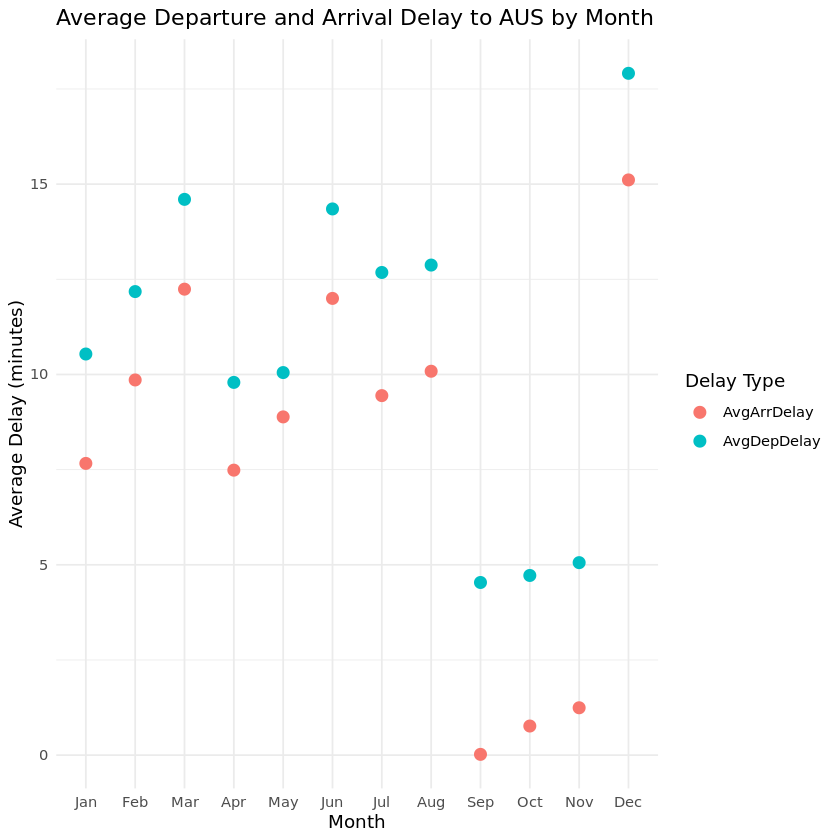

In [124]:
# Filter data for flights headed to AUS (Austin-Bergstrom International Airport)
aus_flights <- flight_data %>% 
  filter(Dest == "AUS")

# Calculate average departure delay and average arrival delay for each month
delay_summary <- aus_flights %>%
  group_by(Month) %>%
  summarize(AvgDepDelay = mean(DepDelay, na.rm = TRUE),
            AvgArrDelay = mean(ArrDelay, na.rm = TRUE))

# Reshape the data for plotting
delay_summary_long <- delay_summary %>%
  pivot_longer(cols = c(AvgDepDelay, AvgArrDelay),
               names_to = "Delay_Type",
               values_to = "Average_Delay")

# Create a scatter plot
ggplot(delay_summary_long, aes(x = factor(Month), y = Average_Delay, color = Delay_Type)) +
  geom_point(size = 3) +
  labs(title = "Average Departure and Arrival Delay to AUS by Month",
       x = "Month",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_x_discrete(labels = month.abb) + # Using abbreviated month names
  theme_minimal()
print("It seems like the best time of year to fly to minimize delays to AUS is from Sep to Nov.")  

[1] "It seems like the best time of year to fly to minimize delays to EWR are Jan, Sep and Oct."


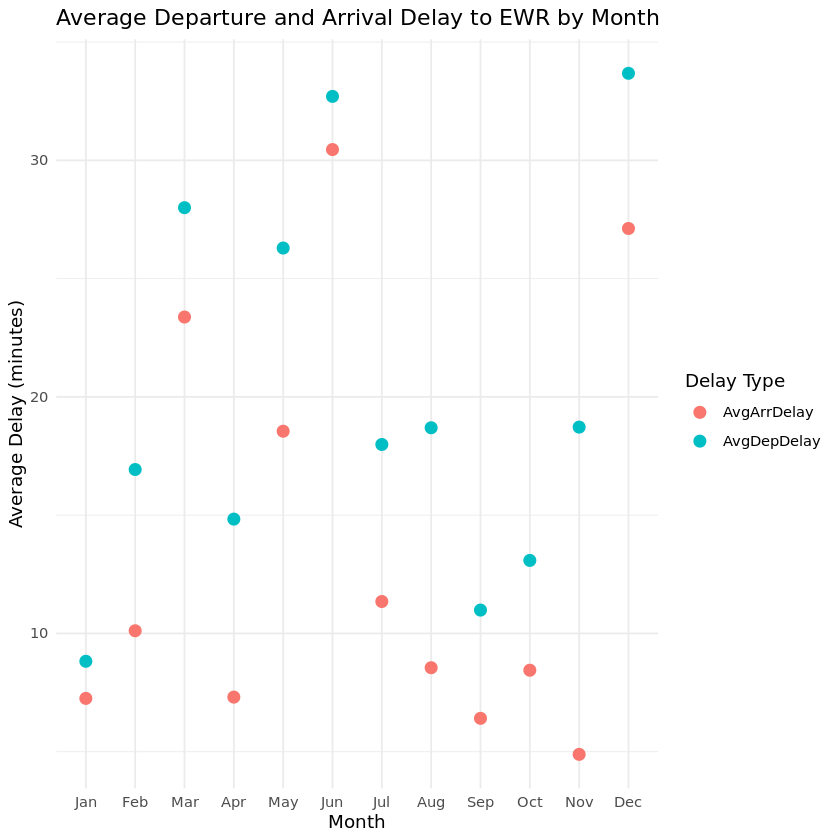

In [125]:
# Filter data for flights headed to AUS (Austin-Bergstrom International Airport)
aus_flights <- flight_data %>% 
  filter(Dest == "EWR")

# Calculate average departure delay and average arrival delay for each month
delay_summary <- aus_flights %>%
  group_by(Month) %>%
  summarize(AvgDepDelay = mean(DepDelay, na.rm = TRUE),
            AvgArrDelay = mean(ArrDelay, na.rm = TRUE))

# Reshape the data for plotting
delay_summary_long <- delay_summary %>%
  pivot_longer(cols = c(AvgDepDelay, AvgArrDelay),
               names_to = "Delay_Type",
               values_to = "Average_Delay")

# Create a scatter plot
ggplot(delay_summary_long, aes(x = factor(Month), y = Average_Delay, color = Delay_Type)) +
  geom_point(size = 3) +
  labs(title = "Average Departure and Arrival Delay to EWR by Month",
       x = "Month",
       y = "Average Delay (minutes)",
       color = "Delay Type") +
  scale_x_discrete(labels = month.abb) + # Using abbreviated month names
  theme_minimal()
print("It seems like the best time of year to fly to minimize delays to EWR are Jan, Sep and Oct.")   

`summarise()` has grouped output by 'Month'. You can override using the
`.groups` argument.


[1] "It seems like there is no seasonal change for patterns of flights to different destinations or parts of the country"


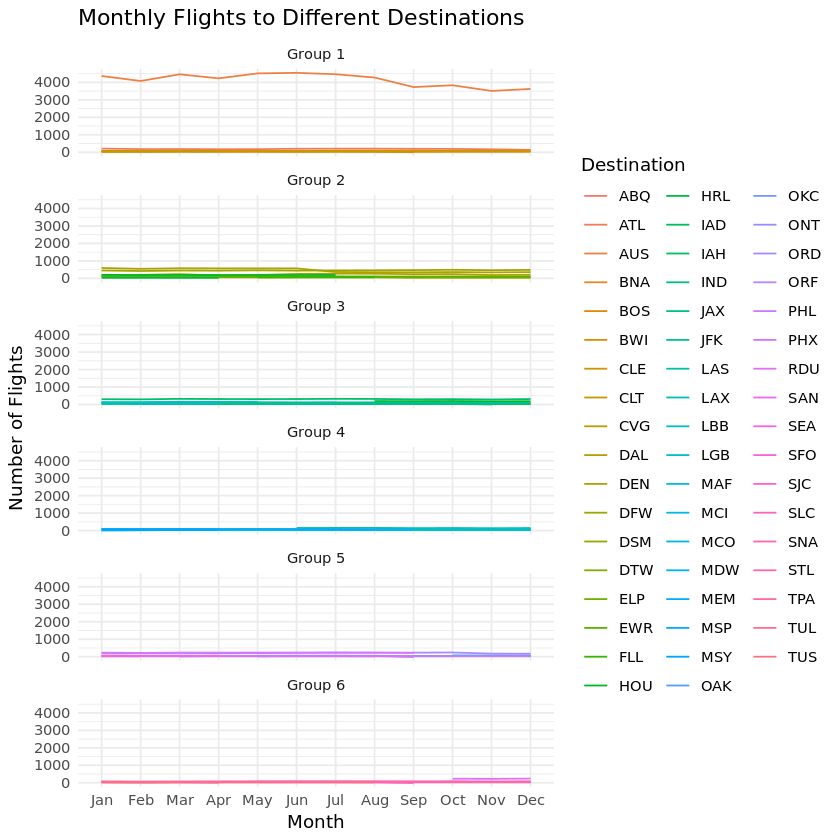

In [126]:

# Calculate the count of flights to each destination for each month
flights_by_destination <- flight_data %>%
  group_by(Month, Dest) %>%
  summarize(Count = n())

# Example: Split destinations into three groups
flights_by_destination <- flights_by_destination %>%
  mutate(Group = cut(row_number(), breaks = 6, labels = c("Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6")))

# Create a line plot with facets
ggplot(flights_by_destination, aes(x = factor(Month), y = Count, group = Dest, color = Dest)) +
  geom_line() +
  labs(title = "Monthly Flights to Different Destinations",
       x = "Month",
       y = "Number of Flights",
       color = "Destination") +
  scale_x_discrete(labels = month.abb) + # Using abbreviated month names
  theme_minimal() +
  facet_wrap(~ Group, nrow =6) # Split into three plots based on the 'Group' variable

print("It seems like there is no seasonal change for patterns of flights to different destinations or parts of the country")  

In [127]:
Olympics <- read.csv("data/olympics_top20.csv")
#"id","name","sex","age","height","weight","team","noc","games","year","season","city","sport","event","medal"

[1] "The 95th percentile of heights for female competitors across all Athletics events is 183 cm"


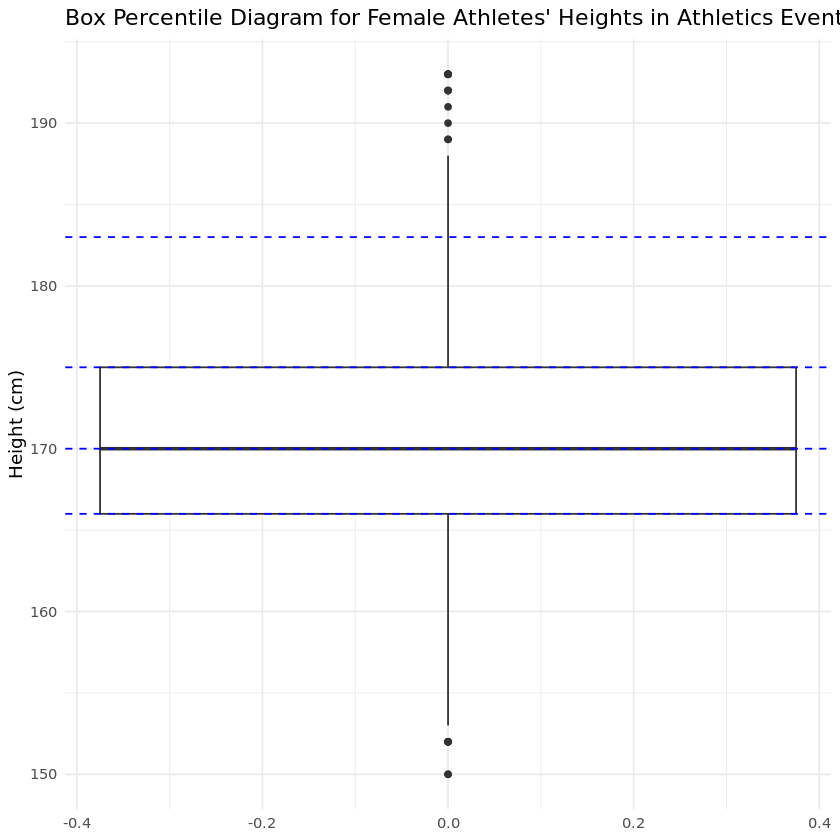

In [128]:
# Filter the data for female competitors in Athletics events
female_athletics <- Olympics[Olympics$sex == "F" & Olympics$sport == "Athletics", ]

# Remove NA values in the height column
female_athletics <- female_athletics[!is.na(female_athletics$height), ]

# Calculate the 95th percentile of heights for female competitors
percentile_95 <- quantile(female_athletics$height, probs = 0.95)

# Print the result
print(paste("The 95th percentile of heights for female competitors across all Athletics events is", percentile_95, "cm"))

# Calculate the percentiles for the heights
percentiles <- quantile(female_athletics$height, probs = c(0.25, 0.5, 0.75, 0.95))

# Create a boxplot with percentile whiskers
ggplot(female_athletics, aes(y = height)) +
  geom_boxplot() +
  geom_hline(yintercept = percentiles, linetype = "dashed", color = "blue") +
  labs(title = "Box Percentile Diagram for Female Athletes' Heights in Athletics Events",
       y = "Height (cm)") +
  theme_minimal()

# A tibble: 1 × 2
  event                        std_dev_height
  <chr>                                 <dbl>
1 Athletics Women's Pole Vault           7.01


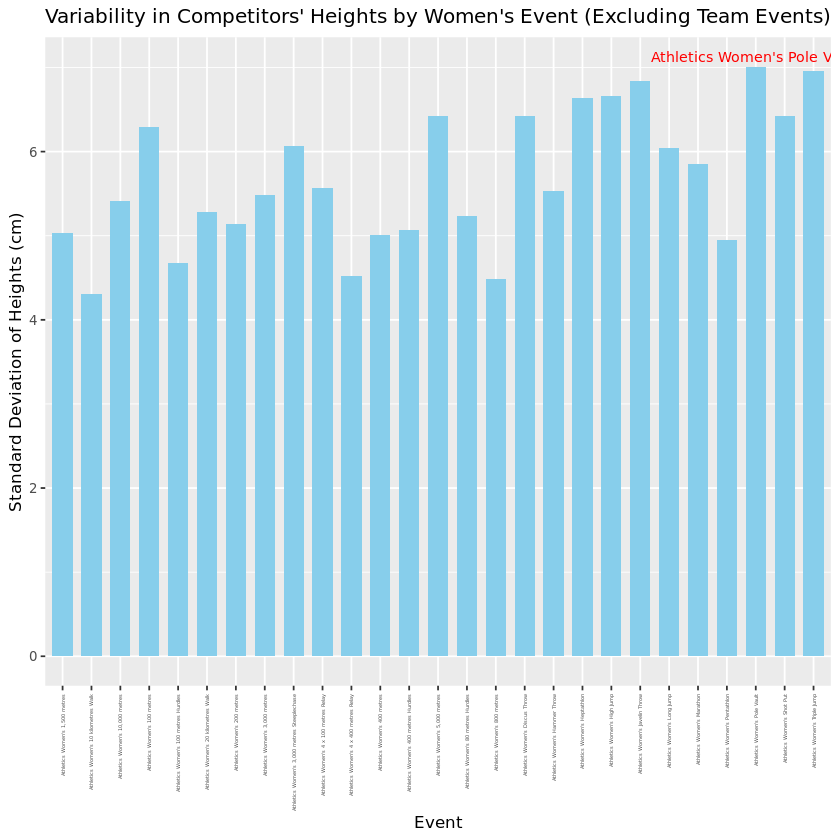

In [129]:
# Filter out events containing the word "team"
female_data <- female_athletics[!grepl("team", tolower(female_athletics$event)), ]

# Group by event and calculate the standard deviation of heights for each event
event_std_dev <- female_data %>%
  group_by(event) %>%
  summarize(std_dev_height = sd(height, na.rm = TRUE)) %>%
  arrange(desc(std_dev_height))

# Find the event with the greatest variability in competitor's heights
max_event <- event_std_dev[which.max(event_std_dev$std_dev_height), ]

# Print the event with the greatest variability in competitor's heights
print(event_std_dev[1, ])

ggplot(event_std_dev, aes(x = event, y = std_dev_height)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.7) +  # Adjust width of bars
  scale_fill_manual(values = ifelse(event_std_dev$event == max_event$event, "skyblue", "red")) +
  labs(title = "Variability in Competitors' Heights by Women's Event (Excluding Team Events)",
       x = "Event",
       y = "Standard Deviation of Heights (cm)") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 3),  # Adjust font size
        axis.text.y = element_text(size = 8),  # Adjust font size
        plot.title = element_text(size = 12),  # Adjust font size
        axis.title = element_text(size = 10)) + # Adjust font size
  geom_text(data = max_event, aes(label = event), vjust = -0.5, size = 3, color = "red")  # Add text for the highest bar

[1] "The trend looks different for male swimmers relative to female swimmers. For male swimmers, the averege age approached a peak at 1925 then suddenly decrease and had a slow volatile rise through 1950 to 2010.\nBut for female, there was no data before 1925 then almost stable until 1975. The rapid rise of average age stopped at 2000."


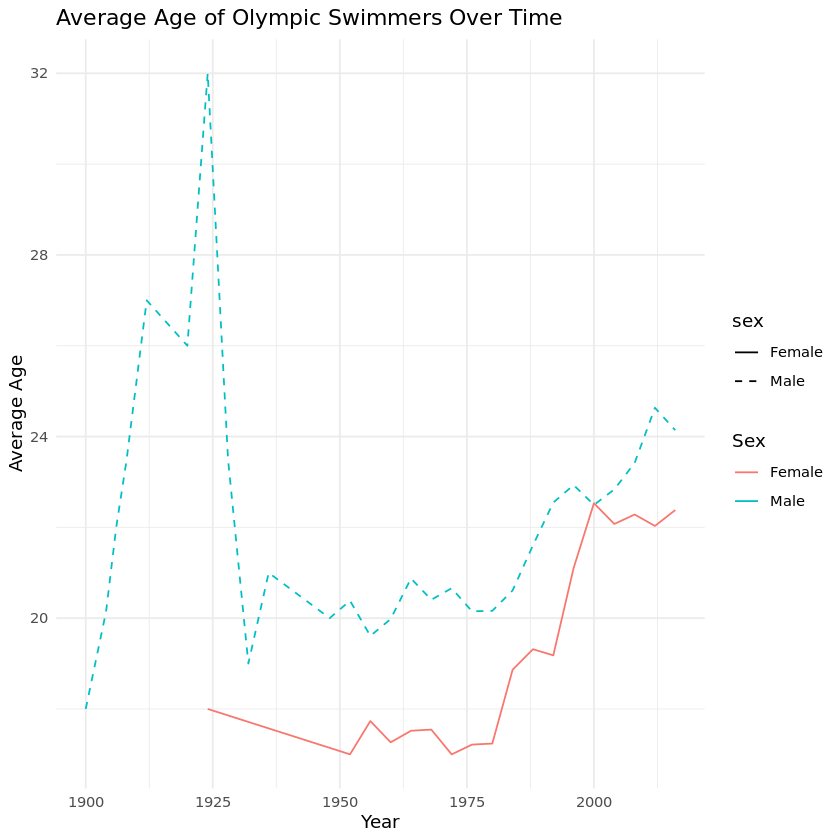

In [130]:
# Filter data for male swimmers only
male_swimmers_data <- Olympics %>%
  filter(sport == "Swimming", sex == "M") 

# Filter data for female swimmers only
female_swimmers_data <- Olympics %>%
  filter(sport == "Swimming", sex == "F")

# Remove rows with NA values in the age column
female_swimmers_data <- female_swimmers_data[complete.cases(female_swimmers_data$age), ]

# Remove rows with NA values in the age column
male_swimmers_data <- male_swimmers_data[complete.cases(male_swimmers_data$age), ]

# Group by year and calculate the average age for female swimmers
average_age_female_swimmers <- female_swimmers_data %>%
  group_by(year) %>%
  summarize(average_age = mean(age))
# Group by year and calculate the average age for male swimmers
average_age_male_swimmers <- male_swimmers_data %>%
  group_by(year) %>%
  summarize(average_age = mean(age))

# Combine both male and female swimmer data in one graph
combined_data <- bind_rows(
  mutate(average_age_male_swimmers, sex = "Male"),
  mutate(average_age_female_swimmers, sex = "Female")
)

# Plot the combined data
ggplot(combined_data, aes(x = year, y = average_age, color = sex, linetype = sex)) +
  geom_line() +
  labs(title = "Average Age of Olympic Swimmers Over Time",
       x = "Year",
       y = "Average Age",
       color = "Sex") +
  scale_linetype_manual(values = c("Female" = "solid", "Male" = "dashed")) +
  theme_minimal()

print("The trend looks different for male swimmers relative to female swimmers. For male swimmers, the averege age approached a peak at 1925 then suddenly decrease and had a slow volatile rise through 1950 to 2010.
But for female, there was no data before 1925 then almost stable until 1975. The rapid rise of average age stopped at 2000.")  

In [7]:
# Load the data
sclass_data <- read.csv("data/sclass.csv")

# Filter data for the two trim levels: 350 and 65 AMG
sclass_350 <- filter(sclass_data, trim == "350")
sclass_65_AMG <- filter(sclass_data, trim == "65 AMG")

# Split the data into training and testing sets for each trim level
set.seed(123) # for reproducibility
train_index_350 <- createDataPartition(sclass_350$price, p = 0.7, list = FALSE)
train_data_350 <- sclass_350[train_index_350, ]
test_data_350 <- sclass_350[-train_index_350, ]

# Convert vectors to data frames
train_df_350 <- data.frame(mileage = train_data_350$mileage)
test_df_350 <- data.frame(mileage = test_data_350$mileage)

train_index_65_AMG <- createDataPartition(sclass_65_AMG$price, p = 0.7, list = FALSE)
train_data_65_AMG <- sclass_65_AMG[train_index_65_AMG, ]
test_data_65_AMG <- sclass_65_AMG[-train_index_65_AMG, ]

# Convert vectors to data frames
train_da_65AMG <- data.frame(mileage = train_data_65_AMG$mileage)
test_da_65AMG <- data.frame(mileage = test_data_65_AMG$mileage)

# Implement K-nearest neighbors algorithm
k_values <- 2:30 # You may adjust the range of K as needed

In [24]:
# Initialize lists to store predictions for each K value
predictions_350 <- list()
predictions_65_AMG <- list()

# Function to calculate RMSE
calculate_RMSE <- function(predictions, actuals) {
  # Convert factors to numeric if needed
  if(is.factor(predictions)) {
    predictions <- as.numeric(as.character(predictions))
  }
  if(is.factor(actuals)) {
    actuals <- as.numeric(as.character(actuals))
  }
  sqrt(mean((predictions - actuals)^2))
}

# Initialize vectors to store RMSE values
RMSE_values_350 <- numeric(length(k_values))
RMSE_values_65_AMG <- numeric(length(k_values))

# Iterate over different values of K
for (k in k_values) {
  # Fit KNN model for trim level 350
  knn_model_350 <- knn(train = train_df_350, test = test_df_350,
                        cl = train_data_350$price, k = k)
  predictions_350[[k]] <- knn_model_350                      
  RMSE_values_350[k] <- calculate_RMSE(knn_model_350, test_data_350$price)

  
  # Fit KNN model for trim level 65 AMG
  knn_model_65_AMG <- knn(train = train_da_65AMG, test = test_da_65AMG,
                           cl = train_data_65_AMG$price, k = k)
  predictions_65_AMG[[k]] <- knn_model_65_AMG                         
  RMSE_values_65_AMG[k] <- calculate_RMSE(knn_model_65_AMG, test_data_65_AMG$price)
}



In [26]:
# Iterate over different values of K
for (i in 1:length(k_values)) {
  k <- k_values[i]
  # Fit KNN model for trim level 350
  knn_model_350 <- knn(train = train_df_350, test = test_df_350,
                        cl = train_data_350$price, k = k)
  predictions_350[[k]] <- knn_model_350
  RMSE_values_350[i] <- calculate_RMSE(knn_model_350, test_data_350$price)

  # Fit KNN model for trim level 65 AMG
  knn_model_65_AMG <- knn(train = train_da_65AMG, test = test_da_65AMG,
                           cl = train_data_65_AMG$price, k = k)
  predictions_65_AMG[[k]] <- knn_model_65_AMG
  RMSE_values_65_AMG[i] <- calculate_RMSE(knn_model_65_AMG, test_data_65_AMG$price)
}

# Find the index of the least RMSE value for each trim level
optimal_index_350 <- which.min(RMSE_values_350)
optimal_index_65_AMG <- which.min(RMSE_values_65_AMG)

# Retrieve the corresponding k values for the least RMSE
optimal_k_350 <- k_values[optimal_index_350]
optimal_k_65_AMG <- k_values[optimal_index_65_AMG]

# Print the least RMSE value and corresponding k value for each trim level
cat("Least RMSE value for Trim Level 350:", least_RMSE_350, "\n")
cat("Corresponding K value for Trim Level 350:", optimal_k_350, "\n")

cat("Least RMSE value for Trim Level 65 AMG:", least_RMSE_65_AMG, "\n")
cat("Corresponding K value for Trim Level 65 AMG:", optimal_k_65_AMG, "\n")


Least RMSE value for Trim Level 350: 9794.288 
Corresponding K value for Trim Level 350: 13 
Least RMSE value for Trim Level 65 AMG: 24210.31 
Corresponding K value for Trim Level 65 AMG: 29 


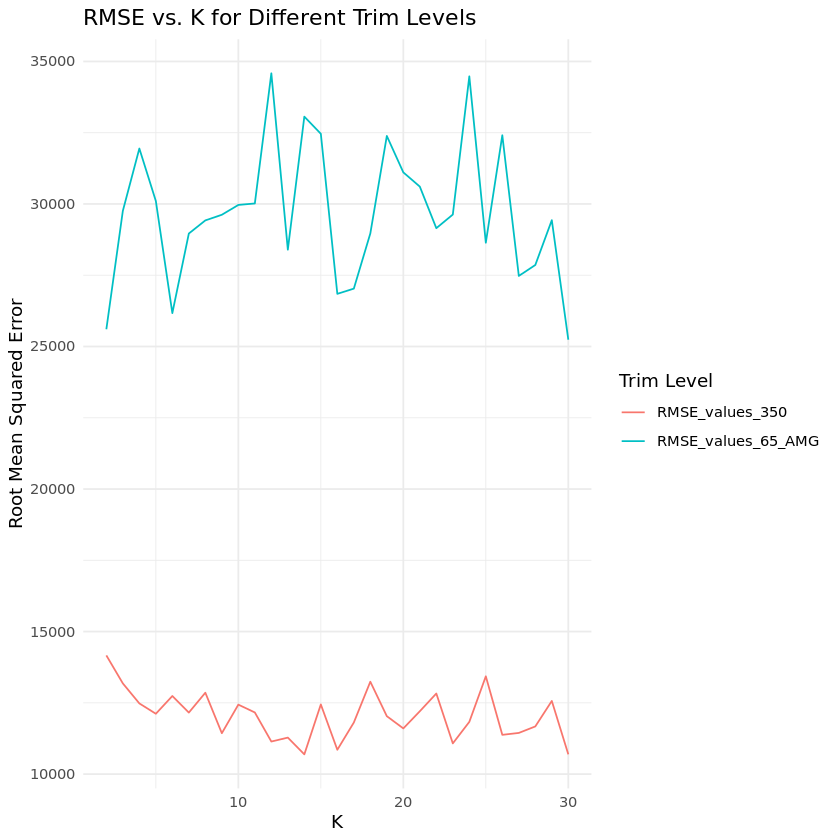

In [20]:
# Create a data frame for plotting
plot_data <- data.frame(
  k_values = k_values,
  RMSE_values_350 = RMSE_values_350[-1],
  RMSE_values_65_AMG = RMSE_values_65_AMG[-1]
)

# Reshape the data for better plotting
plot_data_long <- tidyr::gather(plot_data, Trim_Level, RMSE, -k_values)

# Plot RMSE versus K for each trim level
ggplot(plot_data_long, aes(x = k_values, y = RMSE, color = Trim_Level)) +
  geom_line() +
  labs(title = "RMSE vs. K for Different Trim Levels",
       x = "K",
       y = "Root Mean Squared Error",
       color = "Trim Level") +
  theme_minimal()
  
print("From the graph, we could guess that ")

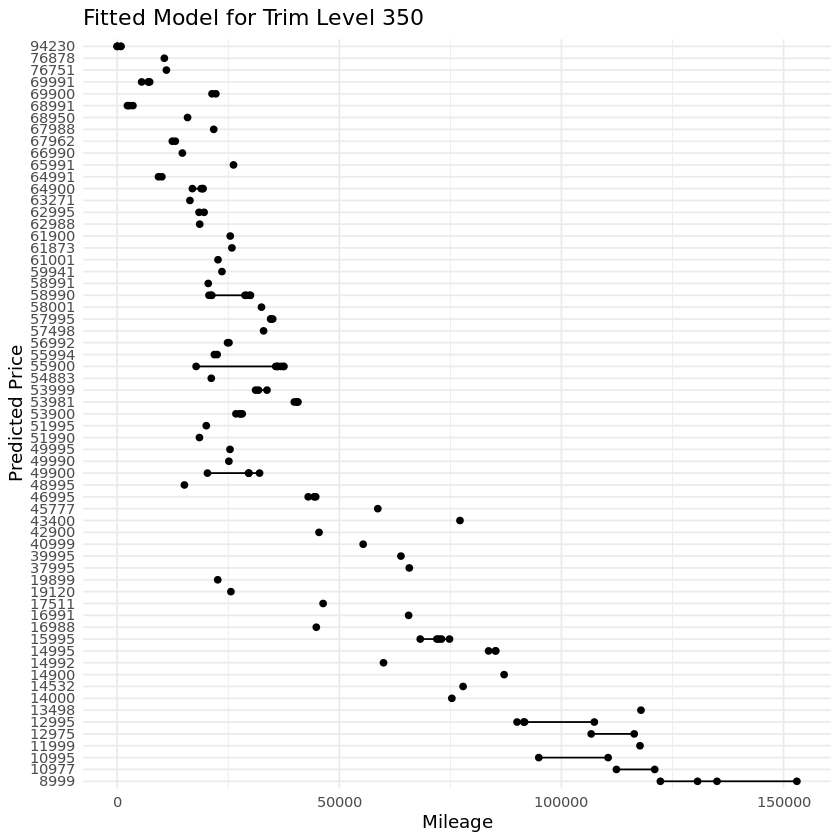

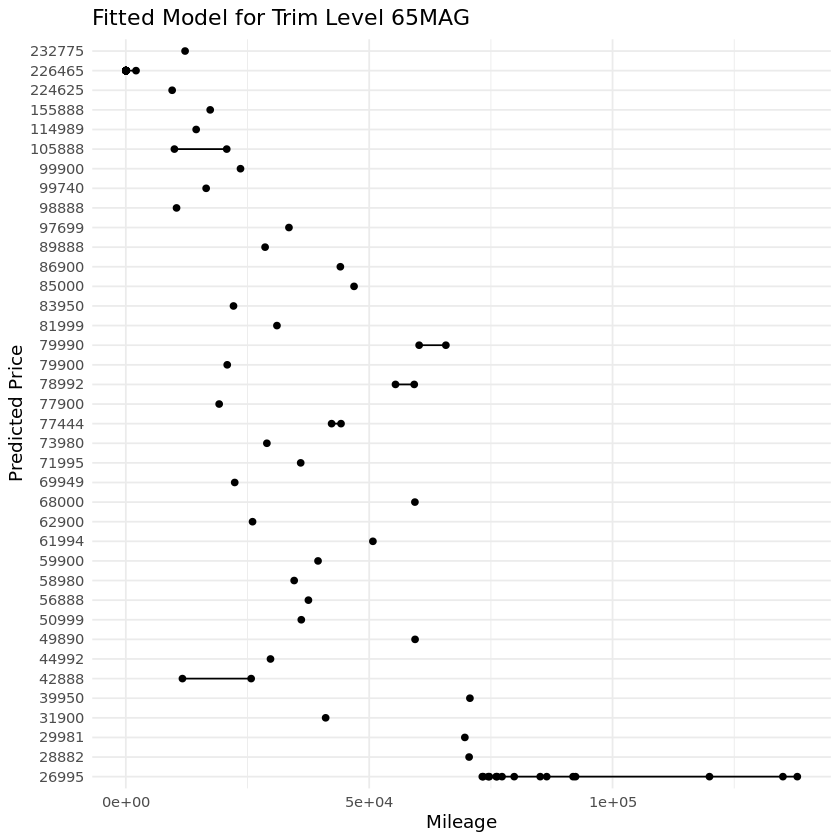

In [28]:
# Plot the fitted model for the optimal value of K for trim level 350
fitted_model_350 <- knn(train = train_df_350, test = test_df_350,
                        cl = train_data_350$price, k = optimal_k_350)
predictions_fitted_350 <- fitted_model_350

ggplot() +
  geom_point(mapping = aes(x = test_data_350$mileage, y = predictions_fitted_350)) +
  geom_line(mapping = aes(x = test_data_350$mileage, y = predictions_fitted_350)) +
  labs(title = "Fitted Model for Trim Level 350",
       x = "Mileage",
       y = "Predicted Price") +
  theme_minimal()

# Plot the fitted model for the optimal value of K for trim level 65 AMG
fitted_model_65MAG <- knn(train = train_da_65AMG, test = test_da_65AMG,
                        cl = train_data_65_AMG$price, k = optimal_k_65_AMG)
predictions_fitted_65MAG <- fitted_model_65MAG

ggplot() +
  geom_point(mapping = aes(x = test_data_65_AMG$mileage, y = fitted_model_65MAG)) +
  geom_line(mapping = aes(x = test_data_65_AMG$mileage, y = fitted_model_65MAG)) +
  labs(title = "Fitted Model for Trim Level 65MAG",
       x = "Mileage",
       y = "Predicted Price") +
  theme_minimal()